In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
titanic_data=pd.read_csv("titanic.csv")
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [128]:
print("# of passengers in original data:"+str(len(titanic_data.index)))

# of passengers in original data:891


Analyzing data

In [129]:
sns.countplot(x="Survived",data=titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

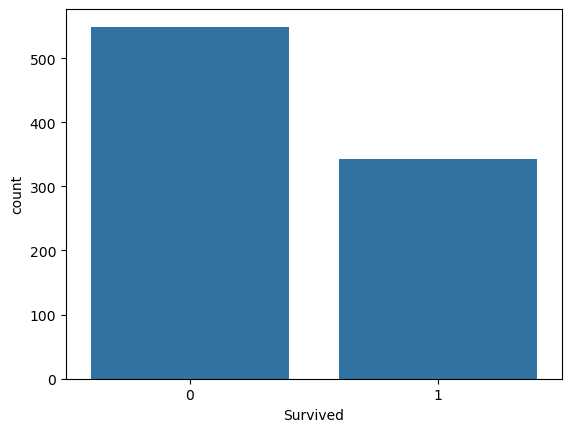

In [130]:
plt.show()

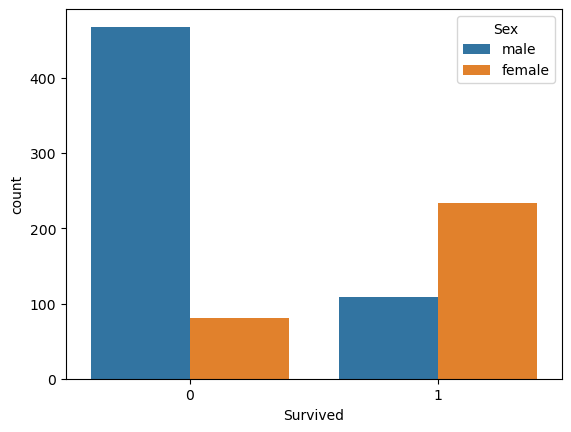

In [131]:
sns.countplot(x="Survived", hue="Sex", data=titanic_data)
plt.show()

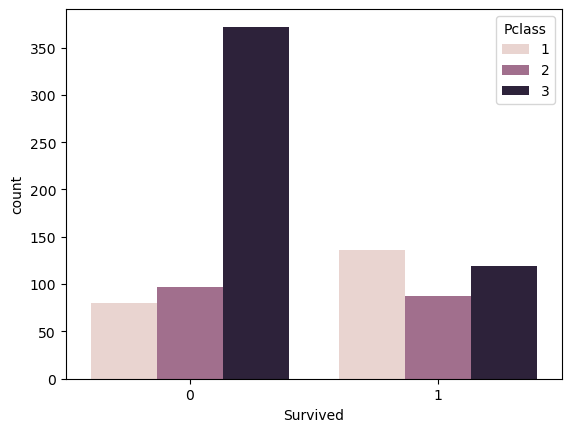

In [132]:
sns.countplot(x="Survived", hue="Pclass", data=titanic_data)
plt.show()

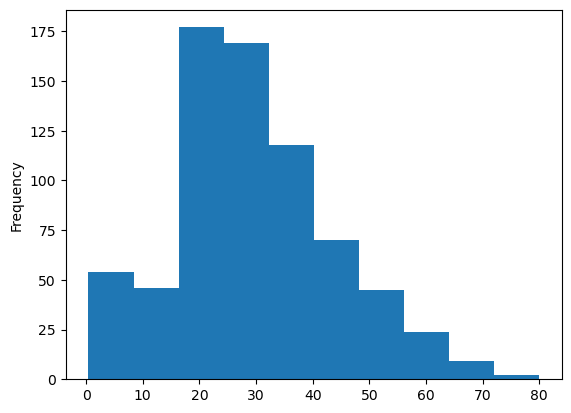

In [133]:
titanic_data["Age"].plot.hist()
plt.show()

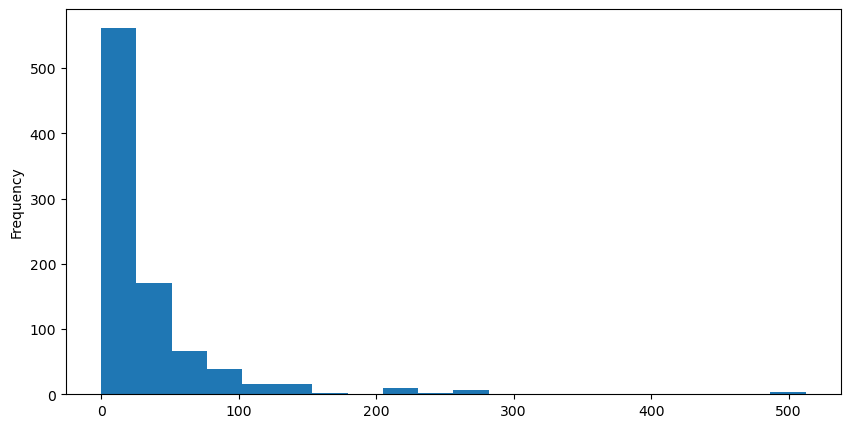

In [134]:
titanic_data["Fare"].plot.hist(bins=20, figsize=(10,5))
plt.show()

In [135]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


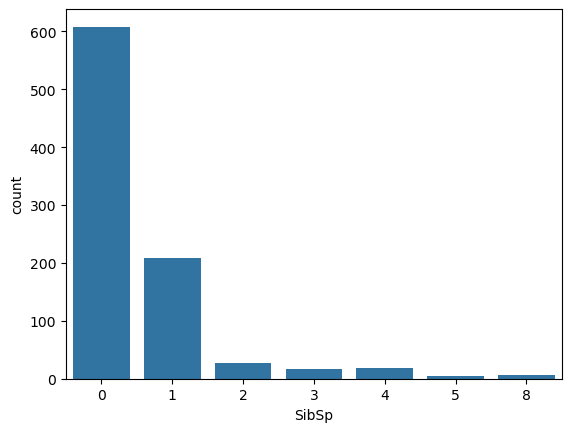

In [136]:
sns.countplot(x="SibSp", data=titanic_data)
plt.show()

Data Wrangling

In [137]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [138]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

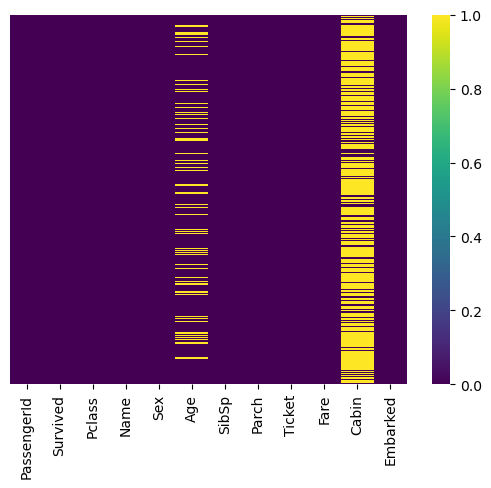

In [139]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cmap="viridis")
plt.show()

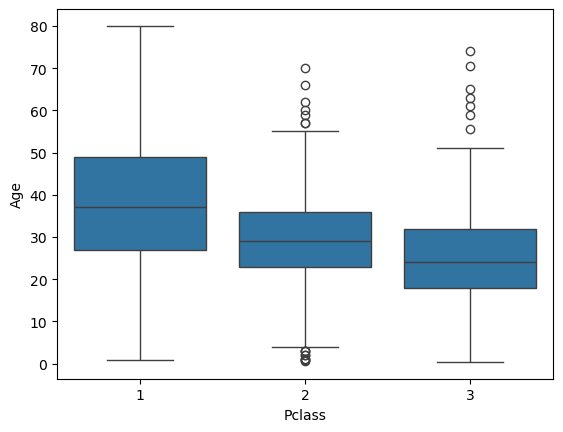

In [140]:
sns.boxplot(x="Pclass", y="Age", data=titanic_data)
plt.show()

In [141]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [142]:
titanic_data.dropna(inplace=True)

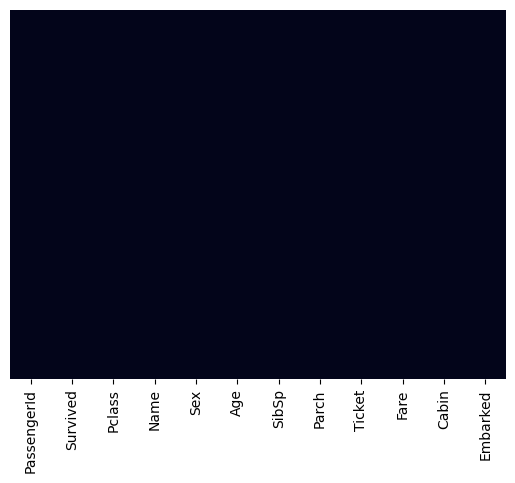

In [143]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False)
plt.show()

In [144]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [145]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [146]:
sex=pd.get_dummies(titanic_data["Sex"], drop_first=True)
sex.head(5)

,male
1,False
3,False
6,True
10,False
11,False


In [147]:
embark=pd.get_dummies(titanic_data["Embarked"], drop_first=True)
embark.head(5)

,Q,S
1,False,False
3,False,True
6,False,True
10,False,True
11,False,True


In [148]:
pcl=pd.get_dummies(titanic_data["Pclass"], drop_first=True)
pcl.head(5)

,2,3
1,False,False
3,False,False
6,False,False
10,False,True
11,False,False


In [149]:
titanic_data=pd.concat([titanic_data, sex, embark, pcl], axis=1)
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,2,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,False,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,False,True,False,False
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,True,False,True,False,False
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,False,False,True,False,True
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,False,False,True,False,False


In [150]:
titanic_data.drop(['Sex','Embarked', 'Pclass','PassengerId','Name','Ticket'],axis=1, inplace=True)
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,Cabin,male,Q,S,2,3
1,1,38.0,1,0,71.2833,C85,False,False,False,False,False
3,1,35.0,1,0,53.1000,C123,False,False,True,False,False
6,0,54.0,0,0,51.8625,E46,True,False,True,False,False
10,1,4.0,1,1,16.7000,G6,False,False,True,False,True
11,1,58.0,0,0,26.5500,C103,False,False,True,False,False


Train data

In [151]:
X=titanic_data.drop('Survived', axis=1)
y=titanic_data['Survived']

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [154]:
from sklearn.linear_model import LogisticRegression

In [155]:
logmodel=LogisticRegression()

In [169]:
titanic_data = pd.read_csv("titanic.csv")
titanic_data = titanic_data.drop(["Cabin", "Name", "Ticket"], axis=1)
titanic_data = titanic_data.dropna()
titanic_data = pd.get_dummies(titanic_data, columns=["Sex", "Embarked"], drop_first=True)
X = titanic_data.drop("Survived", axis=1)
y = titanic_data["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [170]:
predictions=logmodel.predict(X_test)

In [171]:
from sklearn.metrics import classification_report

In [172]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.82      0.83      0.82       126\n           1       0.75      0.74      0.74        88\n\n    accuracy                           0.79       214\n   macro avg       0.78      0.78      0.78       214\nweighted avg       0.79      0.79      0.79       214\n'

In [173]:
from sklearn.metrics import confusion_matrix

In [174]:
confusion_matrix(y_test, predictions)

array([[104,  22],
       [ 23,  65]])

In [175]:
from sklearn.metrics import accuracy_score

In [176]:
accuracy_score(y_test, predictions)

0.7897196261682243